# Lets Play Cricket - IPL Exploration Analysis

An data analysis exploration for Cricket fans!

# 1. Data Understanding

![](https://matchday.in/wp-content/uploads/2020/09/Dream-11-IPL-2020-schedule-announced.jpg)

In [1]:
# Our imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# ball by ball data
delivery_data = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/deliveries.csv') 

# IPL Match Data from 2008 and 2016.
match_data = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/matches.csv')

In [3]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


### Let's show some Stats

In [5]:
biggest_win = match_data['win_by_runs'].max()
print("Biggest Win Margin was " + str(biggest_win) + " runs.")

teams_biggest_win = []

Biggest Win Margin was 144 runs.


In [6]:
# Which game was this biggest win?
f = match_data.loc[match_data['win_by_runs'] == biggest_win]
f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
560,561,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


In [7]:
teams_biggest_win.append((str(f['season'].tolist()[0])))
teams_biggest_win.append((str(f['venue'].tolist()[0])))
teams_biggest_win.append(str(f['team1'].tolist()[0]))
teams_biggest_win.append(str(f['team2'].tolist()[0]))
teams_biggest_win.append(str(f['winner'].tolist()[0]))
teams_biggest_win

['2016',
 'M Chinnaswamy Stadium',
 'Royal Challengers Bangalore',
 'Gujarat Lions',
 'Royal Challengers Bangalore']

In [8]:
tie_matches_no = match_data.loc[match_data['result']=='tie']
tie_matches_no

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
130,131,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
328,329,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chowdhary,S Ravi,NaN
341,342,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
416,417,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
476,477,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN


In [9]:
# Games where the Duckworth-Lewis system was used
f = match_data.loc[match_data['dl_applied'] == 1]
season_number = f['season'].value_counts()
dl_stadium = f['venue'].value_counts()

In [10]:
print(dl_stadium)

Eden Gardens                                           3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Feroz Shah Kotla                                       2
M Chinnaswamy Stadium                                  2
Rajiv Gandhi International Stadium, Uppal              2
SuperSport Park                                        1
Kingsmead                                              1
Newlands                                               1
Nehru Stadium                                          1
Name: venue, dtype: int64


### Some cool IPL Facts and Records

1. Biggest win in terms of run margin was witnessed in Season of **2017** where **Mumbai Indians** won by **146** runs against **Delhi Daredevils** at **Feroz Shah Kotla**
2. From 2008 to 2017 only **7** Matches have Tied in **IPL**.
3. Since 2008 to 2017 only **16** Matches have been Decided on Duckworth Lewis Method and in 2016 highest matches were decided by this System that counted to 4.
4. **Eden Gardens** is the Venue where highest macthes have been Decided on DL Method (**3 each**).

### The 7 Most Popular Venues in the IPL from 2008 to 2017

In [11]:
match_data['venue'].value_counts().sort_values(ascending=False)

M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium                                   

C:\Users\COM\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


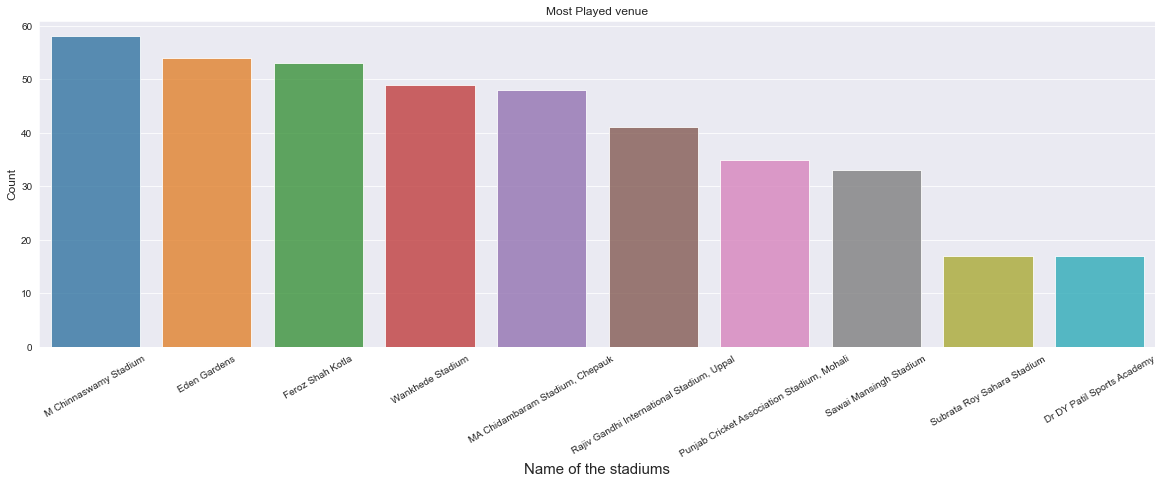

In [12]:
sns.set_style("darkgrid")# to make background with grid
ls=match_data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


This shows **M Chinnaswamy stadium** has hosted most matches in the History of IPL

# 2. Visualizations - Match Statistics
## Player with the most 'Man of the Matches' across 9 Seasons

In [13]:
match_data['player_of_match'].value_counts().head(10)

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
SK Raina          13
MEK Hussey        12
MS Dhoni          12
AM Rahane         12
G Gambhir         12
Name: player_of_match, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



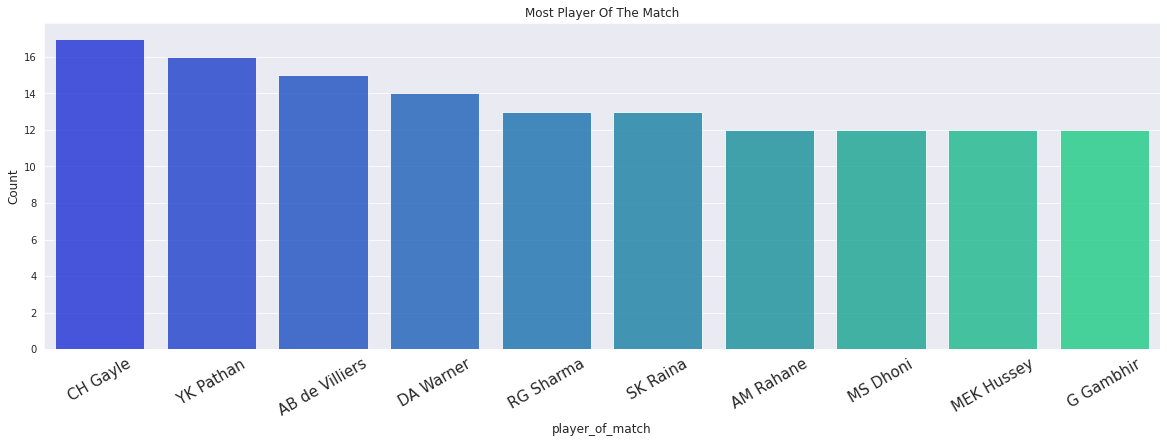

In [18]:
man_of_match = match_data['player_of_match'].value_counts()
man_of_match = man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches = sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

**Chris Gayle** has recived most man of the matches from 2008 to 2017

# Matches Played across each season

Text(0.5, 0, 'Season')

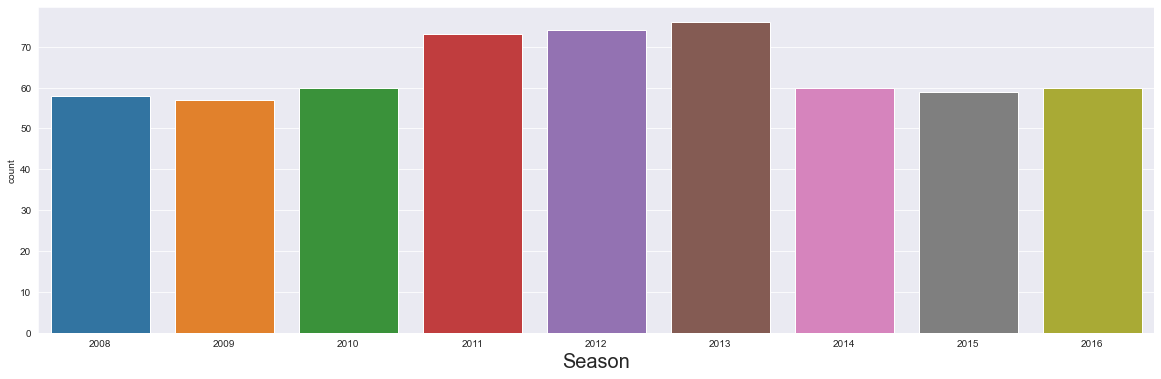

In [14]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

This Shows Most Matches were played in the **2013** Season

# Most Favourite Umpires

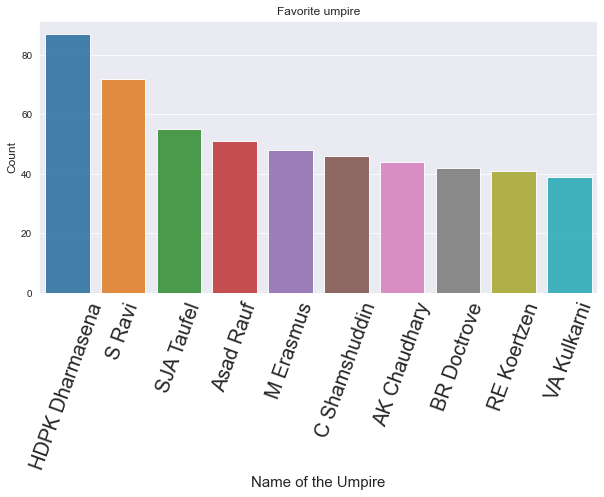

In [15]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:10]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)
plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=70,labels=ump.index,fontsize=20)
plt.show()




This shows that **Dharamsena** and **S Ravi** were the favourite Umpires.


# Stadium Wise Analysis for Most Played 6 Venues

##  *Feroz Shah Kotla*

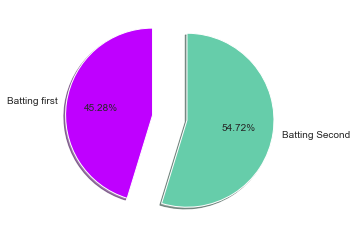

In [16]:
Delhi_stadium=match_data.loc[(match_data['venue']=='Feroz Shah Kotla') ]
# Teams batting first won
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

This Shows that **Batting Second** is Slightly Preferrable on **Feroz Shah Kotla**

##  *Eden Gardens*

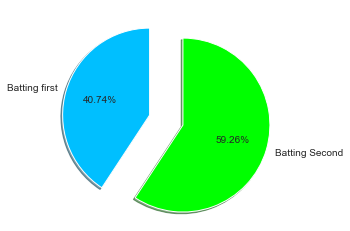

In [17]:
Kolkata_stadium=match_data.loc[(match_data['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

Batting Second on **Eden Gardens** is Clearly Favourable

## *Wankhede Stadium*

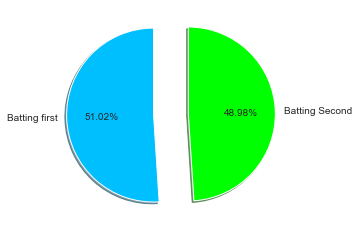

In [18]:
Mumbai_stadium=match_data.loc[(match_data['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

This shows it's almost equal if a Teams Bat's First or Bowl's First at **Wankhede Stadium**

## *M Chinnaswamy Stadium*

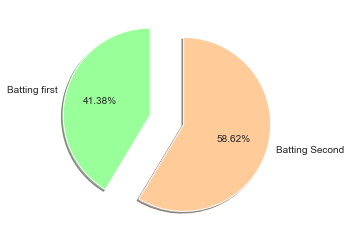

In [19]:
M_Chinnaswamy_Stadium=match_data.loc[(match_data['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

Batting Second on **M Chinnaswamy Stadium** has Better win Percentage

## *MA Chidambaram Stadium, Chepauk*

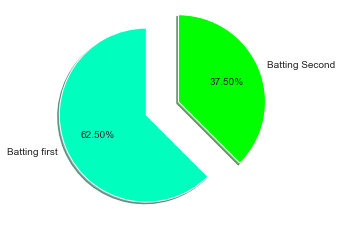

In [20]:

Chennai_stadium=match_data.loc[(match_data['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.show()

Batting Fisrt at **MA Chidambaram Stadium, Chepauk** is clearly a Good Option

# 3.  A Deep Analysis of the Games in 2016  

Is **Toss Winner** Also the Match Winner? For the year 2016

In [21]:
len(match_data[match_data['season']==2016])

60

In [22]:
match_2016 = match_data[match_data['season'] == 2016]
print(len(match_2016[match_2016['toss_winner'] == match_2016['winner']]))
match_2016[match_2016['toss_winner'] == match_2016['winner']].head()

34


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
518,519,2016,Kolkata,2016-04-10,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,AD Russell,Eden Gardens,S Ravi,C Shamshuddin,NaN
519,520,2016,Chandigarh,2016-04-11,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
521,522,2016,Kolkata,2016-04-13,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens,Nitin Menon,S Ravi,NaN
523,524,2016,Delhi,2016-04-15,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,A Mishra,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
525,526,2016,Mumbai,2016-04-16,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,3,AJ Finch,Wankhede Stadium,HDPK Dharmasena,VK Sharma,NaN


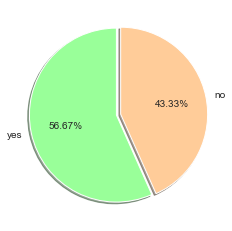

In [23]:
match_2016 = match_data[match_data['season'] == 2016]
df = match_2016[match_2016['toss_winner'] == match_2016['winner']]

# because total of 60 matches were played in 2016
slices = [len(df), (60-len(df))] 
labels = ['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

**YES**, In 2016 if a team won the **toss** they had slightly better chances to win the match

Trends in 2016 after **winning the toss**.

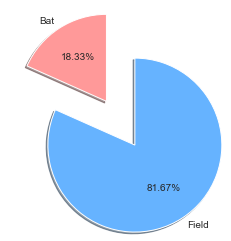

In [24]:
dfs = match_data[(match_data['toss_decision']=='field') & (match_data['season']==2016) ]
labels=['Bat','Field']
slices=[60-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Teams winning toss in 2016 majorly decide to **Field** first.

## Why do sides choose to field first?

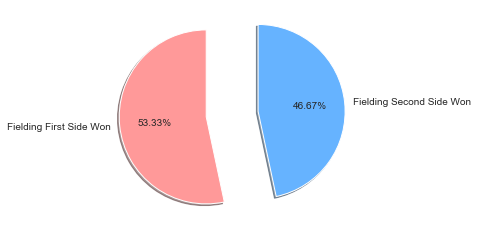

In [25]:
dfd = match_2016[(match_2016['toss_decision']=='field') & (match_2016['toss_winner']==match_2016['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),60-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Sides Fielding First Side Won More Matches in 2016

# Team Comparisons

In [26]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [27]:
def comparator(team1):
    # you can take team2 here also
    teams=list(match_data.team1.unique()) 

    # Remove team1
    teams.remove(team1)

    #make a list if all oppenents
    opponents=teams.copy()

    # Collect data from match data where team one played (they can be in either team1 or team2 columns)
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]

    for t in opponents:
        # each time comparing each opponent team and the team we are looking for
        mask = (((mt1['team1']==t)|(mt1['team2']==t)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        # to_frame to convert to DataFrame and T is used to Transpose
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)


In [28]:
comparator('Mumbai Indians')

        Mumbai Indians  Kolkata Knight Riders
winner              13                      5
        Mumbai Indians  Chennai Super Kings
winner              12                   10
        Mumbai Indians  Rajasthan Royals
winner              10                 6
        Mumbai Indians  Deccan Chargers
winner               6                4
        Kings XI Punjab  Mumbai Indians
winner                9               9
        Mumbai Indians  Royal Challengers Bangalore
winner              11                            8
        Mumbai Indians  Delhi Daredevils
winner               9                 9
        Kochi Tuskers Kerala
winner                     1
        Mumbai Indians  Pune Warriors
winner               5              1
        Mumbai Indians  Sunrisers Hyderabad
winner               4                    4
        Rising Pune Supergiants  Mumbai Indians
winner                        1               1
        Gujarat Lions
winner              2


In [29]:
comparator("Kolkata Knight Riders")

        Chennai Super Kings  Kolkata Knight Riders
winner                   10                      6
        Rajasthan Royals  Kolkata Knight Riders
winner                 9                      6
        Mumbai Indians  Kolkata Knight Riders
winner              13                      5
        Kolkata Knight Riders  Deccan Chargers
winner                      7                2
        Kolkata Knight Riders  Kings XI Punjab
winner                     13                6
        Royal Challengers Bangalore  Kolkata Knight Riders
winner                            9                      9
        Kolkata Knight Riders  Delhi Daredevils
winner                     10                 7
        Kochi Tuskers Kerala
winner                     2
        Kolkata Knight Riders  Pune Warriors
winner                      4              1
        Kolkata Knight Riders  Sunrisers Hyderabad
winner                      6                    3
        Kolkata Knight Riders
winner                      